In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Proces przetwarzania danych

In [0]:
df = pd.read_csv('./data/train.csv', index_col=0)

In [3]:
print(df.head())

                  species   margin1   margin2  ...  texture62  texture63  texture64
id                                             ...                                 
1             Acer_Opalus  0.007812  0.023438  ...   0.004883   0.000000   0.025391
2   Pterocarya_Stenoptera  0.005859  0.000000  ...   0.000977   0.039062   0.022461
3    Quercus_Hartwissiana  0.005859  0.009766  ...   0.000000   0.020508   0.002930
5         Tilia_Tomentosa  0.000000  0.003906  ...   0.017578   0.000000   0.047852
6      Quercus_Variabilis  0.005859  0.003906  ...   0.000000   0.000000   0.031250

[5 rows x 193 columns]


# Proces modelowania (znajdowania optymalnych parametrów)

## Split data into train and test

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = df.pop('species')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
print(y[:10])

[ 3 49 65 94 84 40 54 78 53 89]


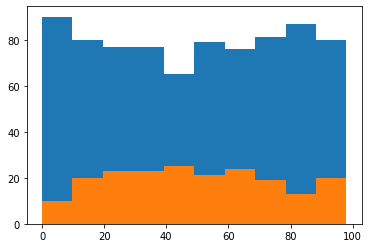

In [6]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

## Scale data

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

## LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            "penalty":["l1","l2"]
}

grid_1 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold)

grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_1.best_estimator_.predict(X_test)) ))

{'C': 1000, 'penalty': 'l2'}
accuracy_score: 0.98989898989899


## SVM with linear kernel

In [10]:
from sklearn.svm import SVC

param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'gamma' : [0.001, 0.01, 0.1, 1]
}

grid_2 = GridSearchCV(SVC(kernel='linear', probability=True), param_grid, cv=kfold)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_2.best_estimator_.predict(X_test)) ))

{'C': 0.1, 'gamma': 0.001}
accuracy_score: 0.9797979797979798


## SVM with polynomial kernel

In [11]:
param_grid = {
            'C': [0.01, 0.1, 1, 10],
            'gamma' : [0.001, 0.01, 0.1, 1],
            'degree': [2,3]
}

grid_3 = GridSearchCV(SVC(kernel='poly', probability=True), param_grid, cv=kfold)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_3.best_estimator_.predict(X_test)) ))

{'C': 0.01, 'degree': 2, 'gamma': 1}
accuracy_score: 0.9797979797979798


## SVM with rbf

In [12]:
param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'gamma' : [0.001, 0.01, 0.1, 1]
}

grid_4 = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=kfold)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_4.best_estimator_.predict(X_test)) ))

{'C': 100, 'gamma': 0.001}
accuracy_score: 0.9848484848484849


## DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
            'max_depth': np.arange(1, 16),
            'min_samples_leaf': [1, 5, 10, 20, 50, 100],
}

grid_5 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=kfold)

grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_5.best_estimator_.predict(X_test)) ))

{'max_depth': 15, 'min_samples_leaf': 10}
accuracy_score: 0.18686868686868688


## RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
            'max_depth': np.arange(1, 16),
            'min_samples_leaf': [1, 5, 10, 20, 50, 100],
}

grid_6 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kfold)

grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_6.best_estimator_.predict(X_test)) ))

{'max_depth': 14, 'min_samples_leaf': 1}
accuracy_score: 0.9343434343434344


## MLPClassifier

In [15]:
from sklearn.neural_network import MLPClassifier
param_grid = {
            'activation': ['relu', 'tanh'],
            'alpha': [0.1, 1],
}

grid_7 = GridSearchCV(MLPClassifier(max_iter=100), param_grid, cv=kfold)

grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, grid_7.best_estimator_.predict(X_test)) ))

{'activation': 'relu', 'alpha': 1}
accuracy_score: 0.98989898989899


In [0]:
classifiers = [
    ('logistic', grid_1.best_estimator_), 
    ('svm_linear', grid_2.best_estimator_), 
    ('svm_poly', grid_3.best_estimator_),
    ('svm_rbf', grid_4.best_estimator_),
    ('tree', grid_5.best_estimator_),
    ('forest', grid_6.best_estimator_),
    ('mlp', grid_7.best_estimator_),
]

## Ensemble of all classifier hard

In [17]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=classifiers)
voting_clf.fit(X_train, y_train)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, voting_clf.predict(X_test)) ))

accuracy_score: 0.9848484848484849


## Ensemble of all classifier soft

In [18]:
voting_clf_soft = VotingClassifier(
    estimators=classifiers,
    voting='soft')
voting_clf_soft.fit(X_train, y_train)
print("accuracy_score: {}".format(metrics.accuracy_score(y_test, voting_clf_soft.predict(X_test)) ))

accuracy_score: 0.98989898989899


# Porównanie kilku modeli

In [0]:
names = []
accuracy = []
r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in classifiers:
    names.append(name)
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))


In [20]:
import pandas as pd
d = {'method': names,
     'accuracy': accuracy,
    }
df = pd.DataFrame(data=d)
df

,method,accuracy
0,logistic,0.989899
1,svm_linear,0.979798
2,svm_poly,0.979798
3,svm_rbf,0.984848
4,tree,0.186869
5,forest,0.934343
6,mlp,0.989899


# Wizualizację wyników

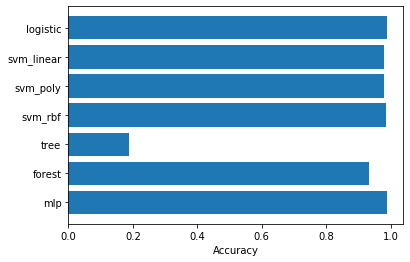

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

y_pos = np.arange(len(names))
ax.barh(y_pos, accuracy, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Accuracy')

plt.show()

# Podsumowanie pracy

Zbiór dostarczonych danych zawierał 1584 obrazków i 99 etykiet(każda jest reprezentowana przez 16 przykładów).

Zbiór testowy kaggle nie miał labely. Czas obliczyć prawdopodobieństwa i wysłać na platforme.

Wzór na kaggle:
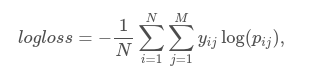

In [22]:
df_test = pd.read_csv('./data/test.csv', index_col=0)
df_test.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,0.007812,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,0.009766,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.

In [23]:
correct_order = 'Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata'
correct_order = np.array(correct_order.split(','))
print(correct_order)

['Acer_Capillipes' 'Acer_Circinatum' 'Acer_Mono' 'Acer_Opalus'
 'Acer_Palmatum' 'Acer_Pictum' 'Acer_Platanoids' 'Acer_Rubrum'
 'Acer_Rufinerve' 'Acer_Saccharinum' 'Alnus_Cordata' 'Alnus_Maximowiczii'
 'Alnus_Rubra' 'Alnus_Sieboldiana' 'Alnus_Viridis' 'Arundinaria_Simonii'
 'Betula_Austrosinensis' 'Betula_Pendula' 'Callicarpa_Bodinieri'
 'Castanea_Sativa' 'Celtis_Koraiensis' 'Cercis_Siliquastrum'
 'Cornus_Chinensis' 'Cornus_Controversa' 'Cornus_Macrophylla'
 'Cotinus_Coggygria' 'Crataegus_Monogyna' 'Cytisus_Battandieri'
 'Eucalyptus_Glaucescens' 'Eucalyptus_Neglecta' 'Eucalyptus_Urnigera'
 'Fagus_Sylvatica' 'Ginkgo_Biloba' 'Ilex_Aquifolium' 'Ilex_Cornuta'
 'Liquidambar_Styraciflua' 'Liriodendron_Tulipifera'
 'Lithocarpus_Cleistocarpus' 'Lithocarpus_Edulis' 'Magnolia_Heptapeta'
 'Magnolia_Salicifolia' 'Morus_Nigra' 'Olea_Europaea' 'Phildelphus'
 'Populus_Adenopoda' 'Populus_Grandidentata' 'Populus_Nigra'
 'Prunus_Avium' 'Prunus_X_Shmittii' 'Pterocarya_Stenoptera'
 'Quercus_Afares' 'Querc

In [0]:
import csv

def write_file(name, preds):
    with open(f'output_{name}.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['id'] + correct_order.tolist())
    for i, row in enumerate(preds):
        writer.writerow([df_test.index[i]] + row.tolist())

#refit
for name, clf in classifiers:
    clf.fit(X, y)
    np.array_equal(correct_order, label_encoder.inverse_transform(clf.classes_))
    preds = clf.predict_proba(df_test)
    write_file(name, preds)


In [0]:
voting_clf_soft.fit(X, y) #refit
preds = voting_clf_soft.predict_proba(df_test)
write_file('voting', preds)

Results on kaggle

mlp 3.95339

forest 1.01360

tree 6.07134

logistic 0.28337

svm linear 4.63210

svm poly 4.61134

svm rbf 4.67727

voting 1.41568

### Zwycięzcą okazał się klasyfikator logistic z wynikiem 0.28337. Tak wynik dawał by 957 miejsce na 1547 drużyn.
